In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%pwd

'/content'

In [3]:
%cd /content/drive/MyDrive/AgriSense_yolov8

/content/drive/MyDrive/AgriSense_yolov8


In [4]:
# ultralytics'i indir.
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (16 CPUs, 62.8 GB RAM, 29.8/201.2 GB disk)


In [ ]:
!unzip weeds.zip -d ./data

Görüntülenen çıkış son 5000 satıra kısaltıldı.
 extracting: ./data/train/labels/20210907_153931_x264_mp4-1778_jpg.rf.f18eee63176a0898d1a7c68061dd9471.txt  
 extracting: ./data/train/labels/20210907_153931_x264_mp4-1779_jpg.rf.19f89074d9f8c53983180d4f421c0cca.txt  
 extracting: ./data/train/labels/20210907_153931_x264_mp4-1779_jpg.rf.73cd745fe861f0ee5f25306a3ffa61e6.txt  
 extracting: ./data/train/labels/20210907_153931_x264_mp4-177_jpg.rf.66f465d645aad82d4bcc322f8c120751.txt  
 extracting: ./data/train/labels/20210907_153931_x264_mp4-177_jpg.rf.e1ada595f5c1bb976cf060e937ba88f8.txt  
 extracting: ./data/train/labels/20210907_153931_x264_mp4-1780_jpg.rf.1e1c7cbc2505bfde97d27007843bfa68.txt  
 extracting: ./data/train/labels/20210907_153931_x264_mp4-1780_jpg.rf.4a5de55d0415c310d6da387ff608fa2b.txt  
 extracting: ./data/train/labels/20210907_153931_x264_mp4-1781_jpg.rf.40b2b9aecd9fa959194883aad8900312.txt  
 extracting: ./data/train/labels/20210907_153931_x264_mp4-1781_jpg.rf.803fe018e075c

In [ ]:
!yolo detect train data=/content/drive/MyDrive/AgriSense_yolov8/data/data.yaml model=yolov8n.pt epochs=100 imgsz=640 workers=8 batch=32 device=0 name=v8_weeds_detection

100% 6.23M/6.23M [00:00<00:00, 45.8MB/s]
Ultralytics YOLOv8.2.12 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/AgriSense_yolov8/data/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=v8_weeds_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=

In [5]:
#Yarıda kalmış ve kesilmiş eğitimi devam ettirme
!yolo detect train model=runs/detect/v8_weeds_detection/weights/last.pt resume=True

Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/v8_weeds_detection/weights/last.pt, data=/content/drive/MyDrive/AgriSense_yolov8/data/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=v8_weeds_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs/detect/v8_weeds_detection/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sho

In [14]:
!yolo detect predict model=runs/detect/v8_weeds_detection/weights/best.pt source=inference save=True  # predict with official model

Ultralytics YOLOv8.2.13 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/8 /content/drive/MyDrive/AgriSense_yolov8/inference/350.jpg: 640x640 7 Weedss, 7.3ms
image 2/8 /content/drive/MyDrive/AgriSense_yolov8/inference/362.jpg: 640x640 (no detections), 7.8ms
image 3/8 /content/drive/MyDrive/AgriSense_yolov8/inference/375.jpg: 640x640 (no detections), 7.3ms
image 4/8 /content/drive/MyDrive/AgriSense_yolov8/inference/397.jpg: 640x640 7 Weedss, 7.1ms
image 5/8 /content/drive/MyDrive/AgriSense_yolov8/inference/406.jpg: 640x640 (no detections), 6.9ms
image 6/8 /content/drive/MyDrive/AgriSense_yolov8/inference/407.jpg: 640x640 6 Weedss, 6.9ms
image 7/8 /content/drive/MyDrive/AgriSense_yolov8/inference/923.jpg: 640x640 2 Weedss, 6.9ms
image 8/8 /content/drive/MyDrive/AgriSense_yolov8/inference/weed.jpg: 384x640 3 Weedss, 121.5ms
Speed: 1.8ms preprocess, 21.5ms inference, 241.7ms postprocess p

In [8]:
from IPython.display import display, Image

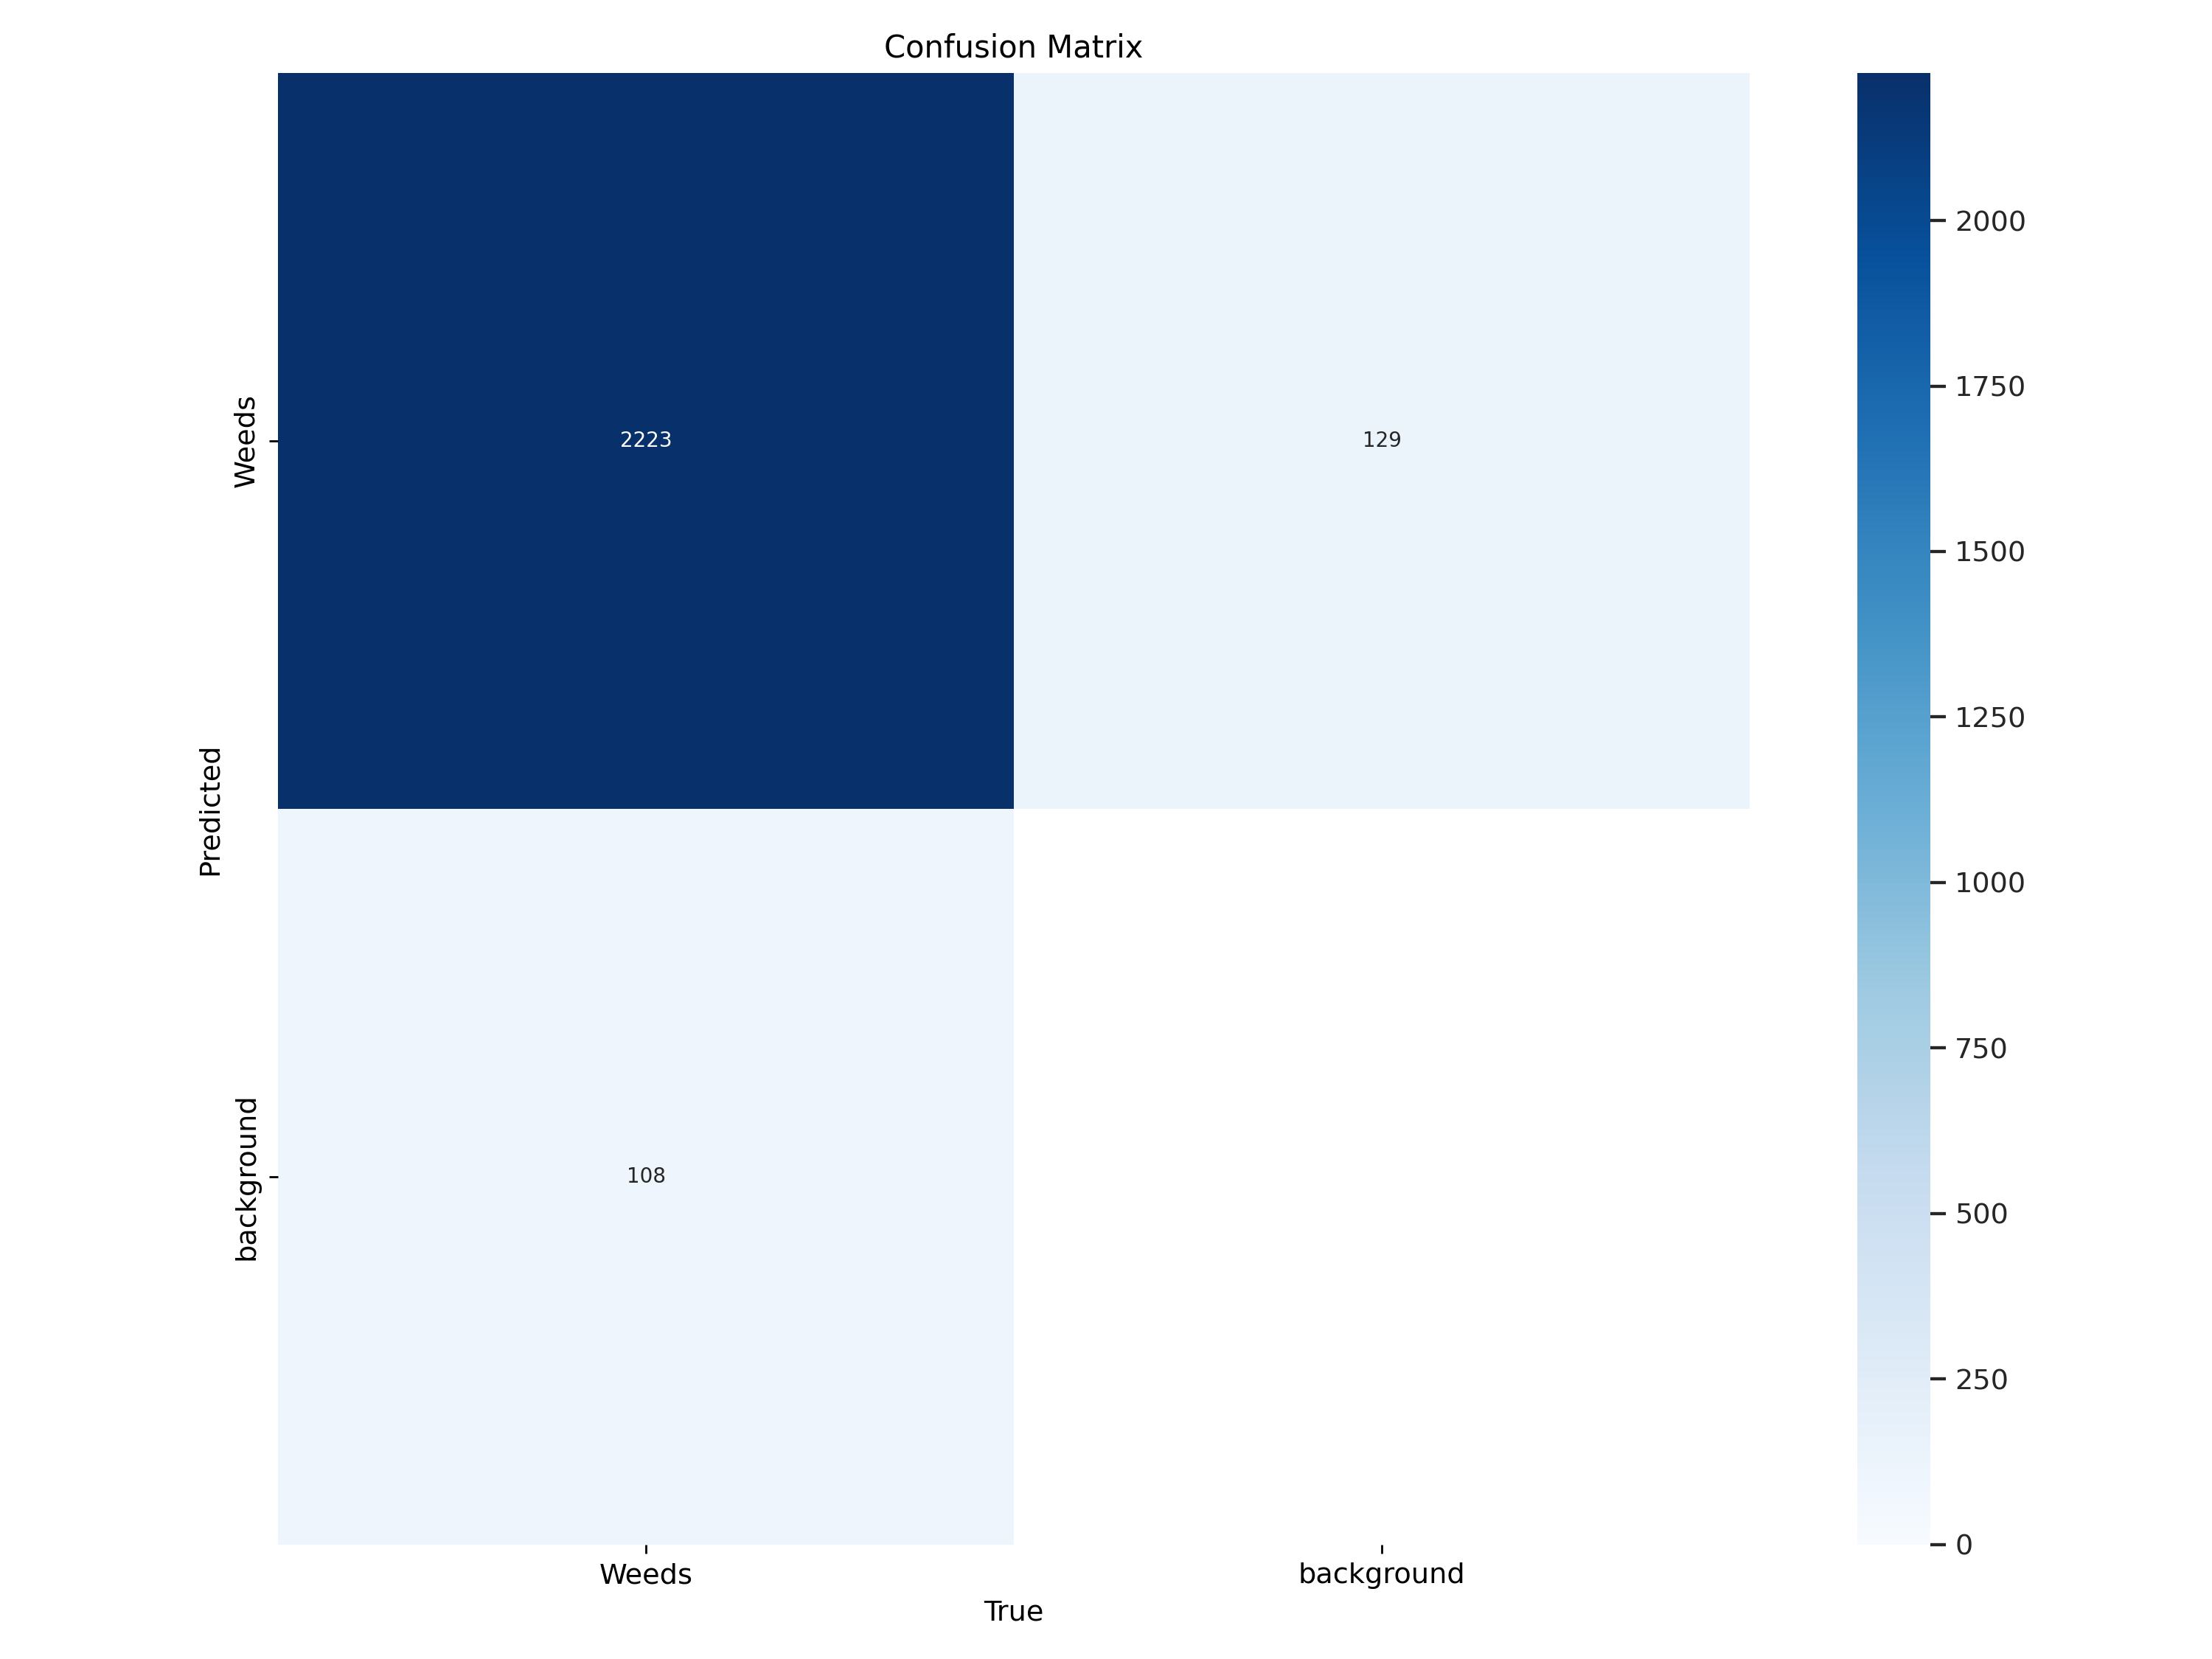

In [9]:
Image(filename='/content/drive/MyDrive/AgriSense_yolov8/runs/detect/v8_weeds_detection/confusion_matrix.png', width=600)

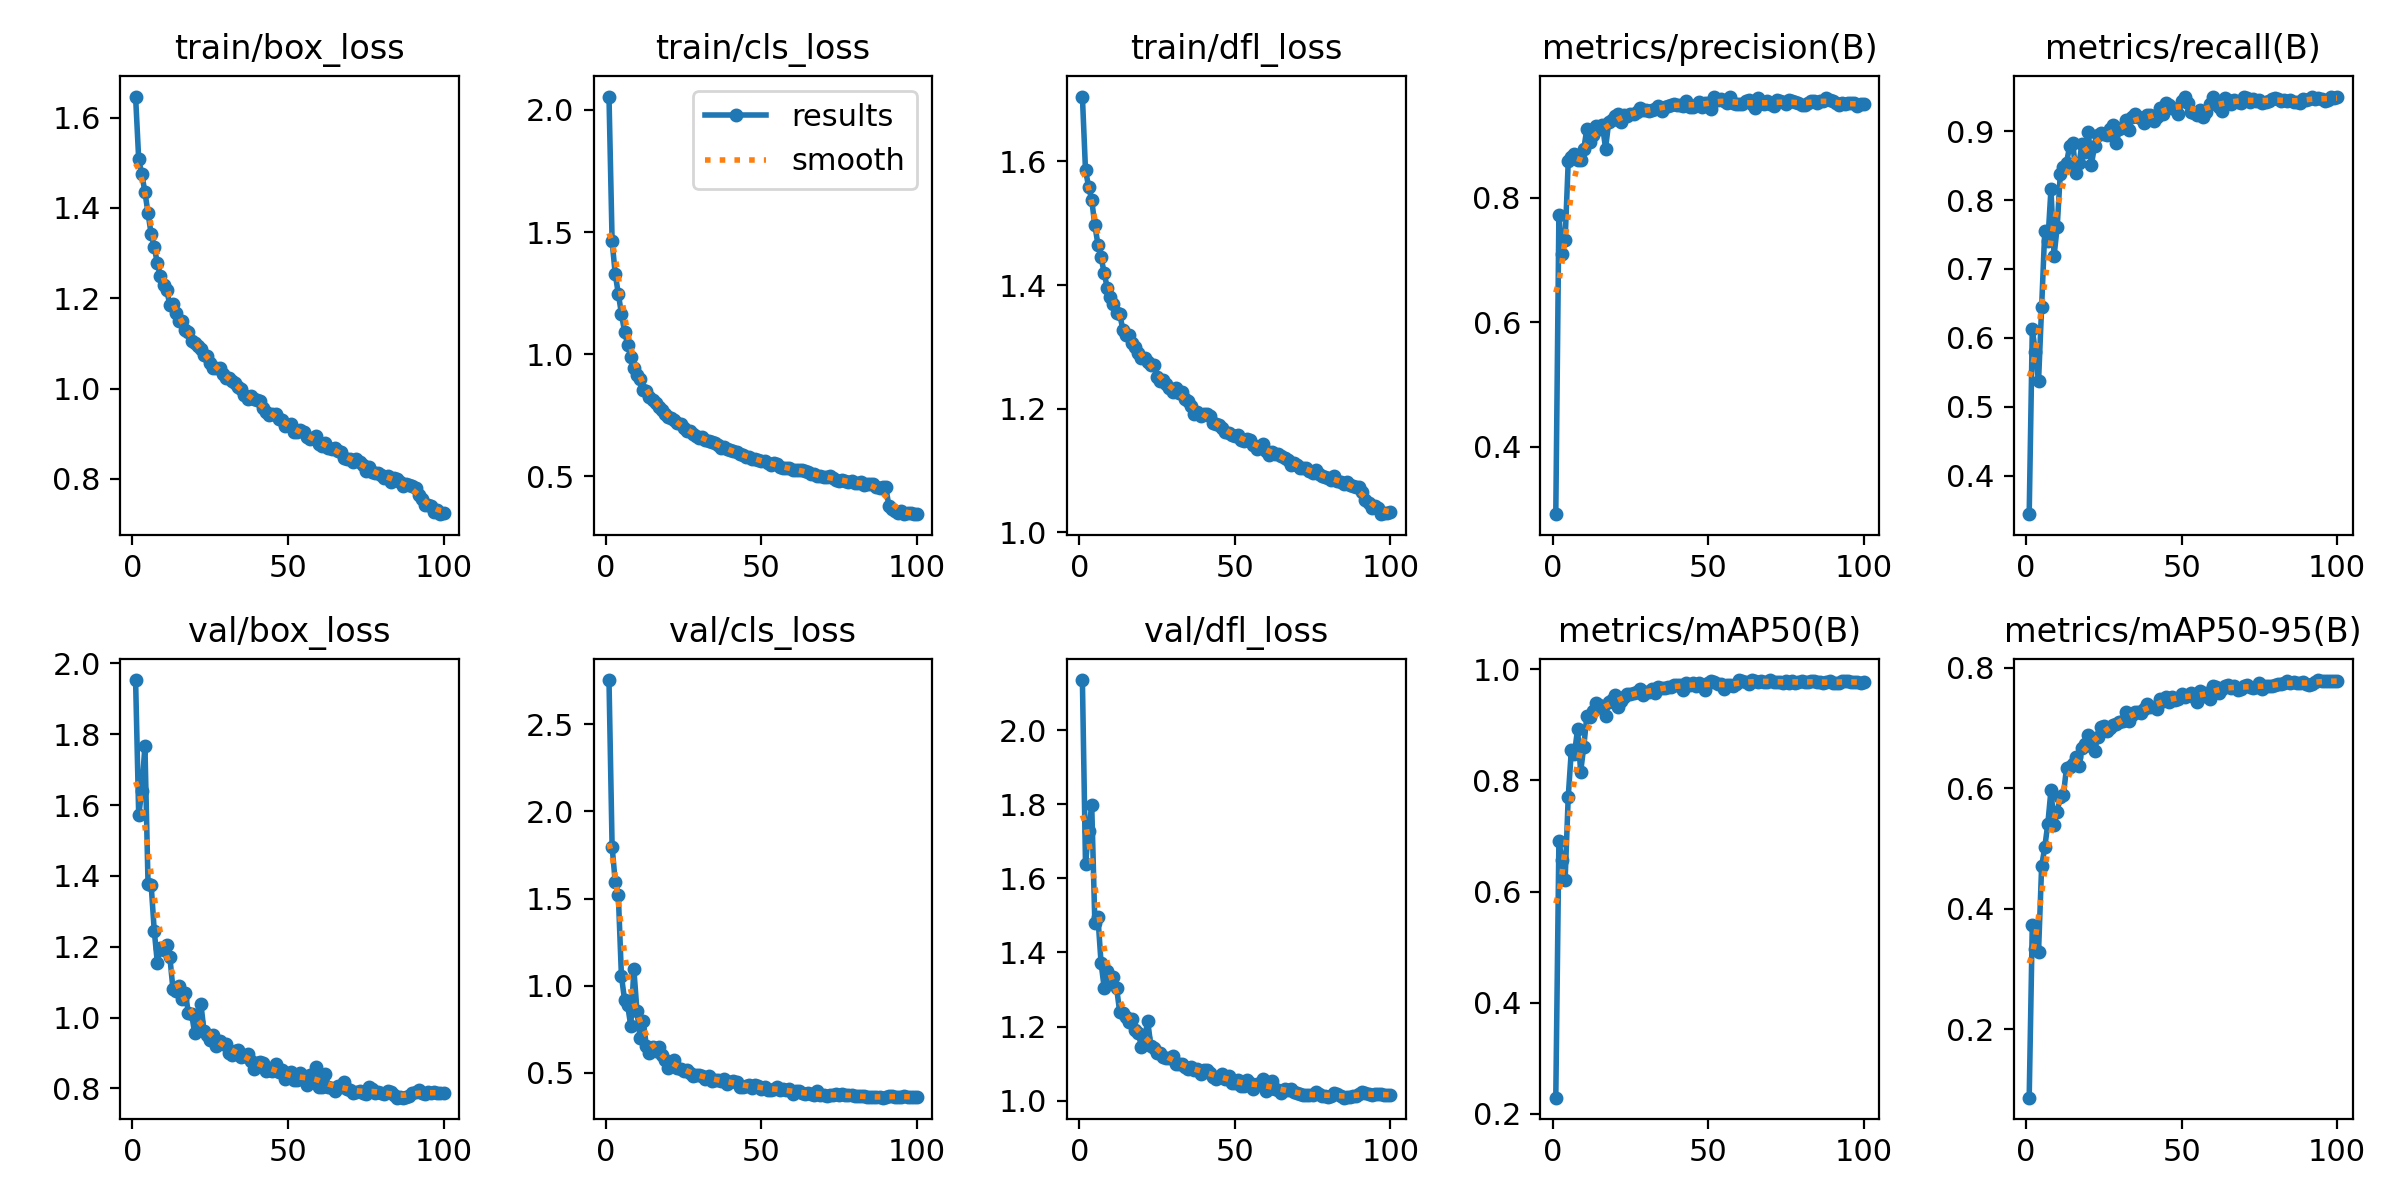

In [11]:
Image(filename='/content/drive/MyDrive/AgriSense_yolov8/runs/detect/v8_weeds_detection/results.png', width=600)

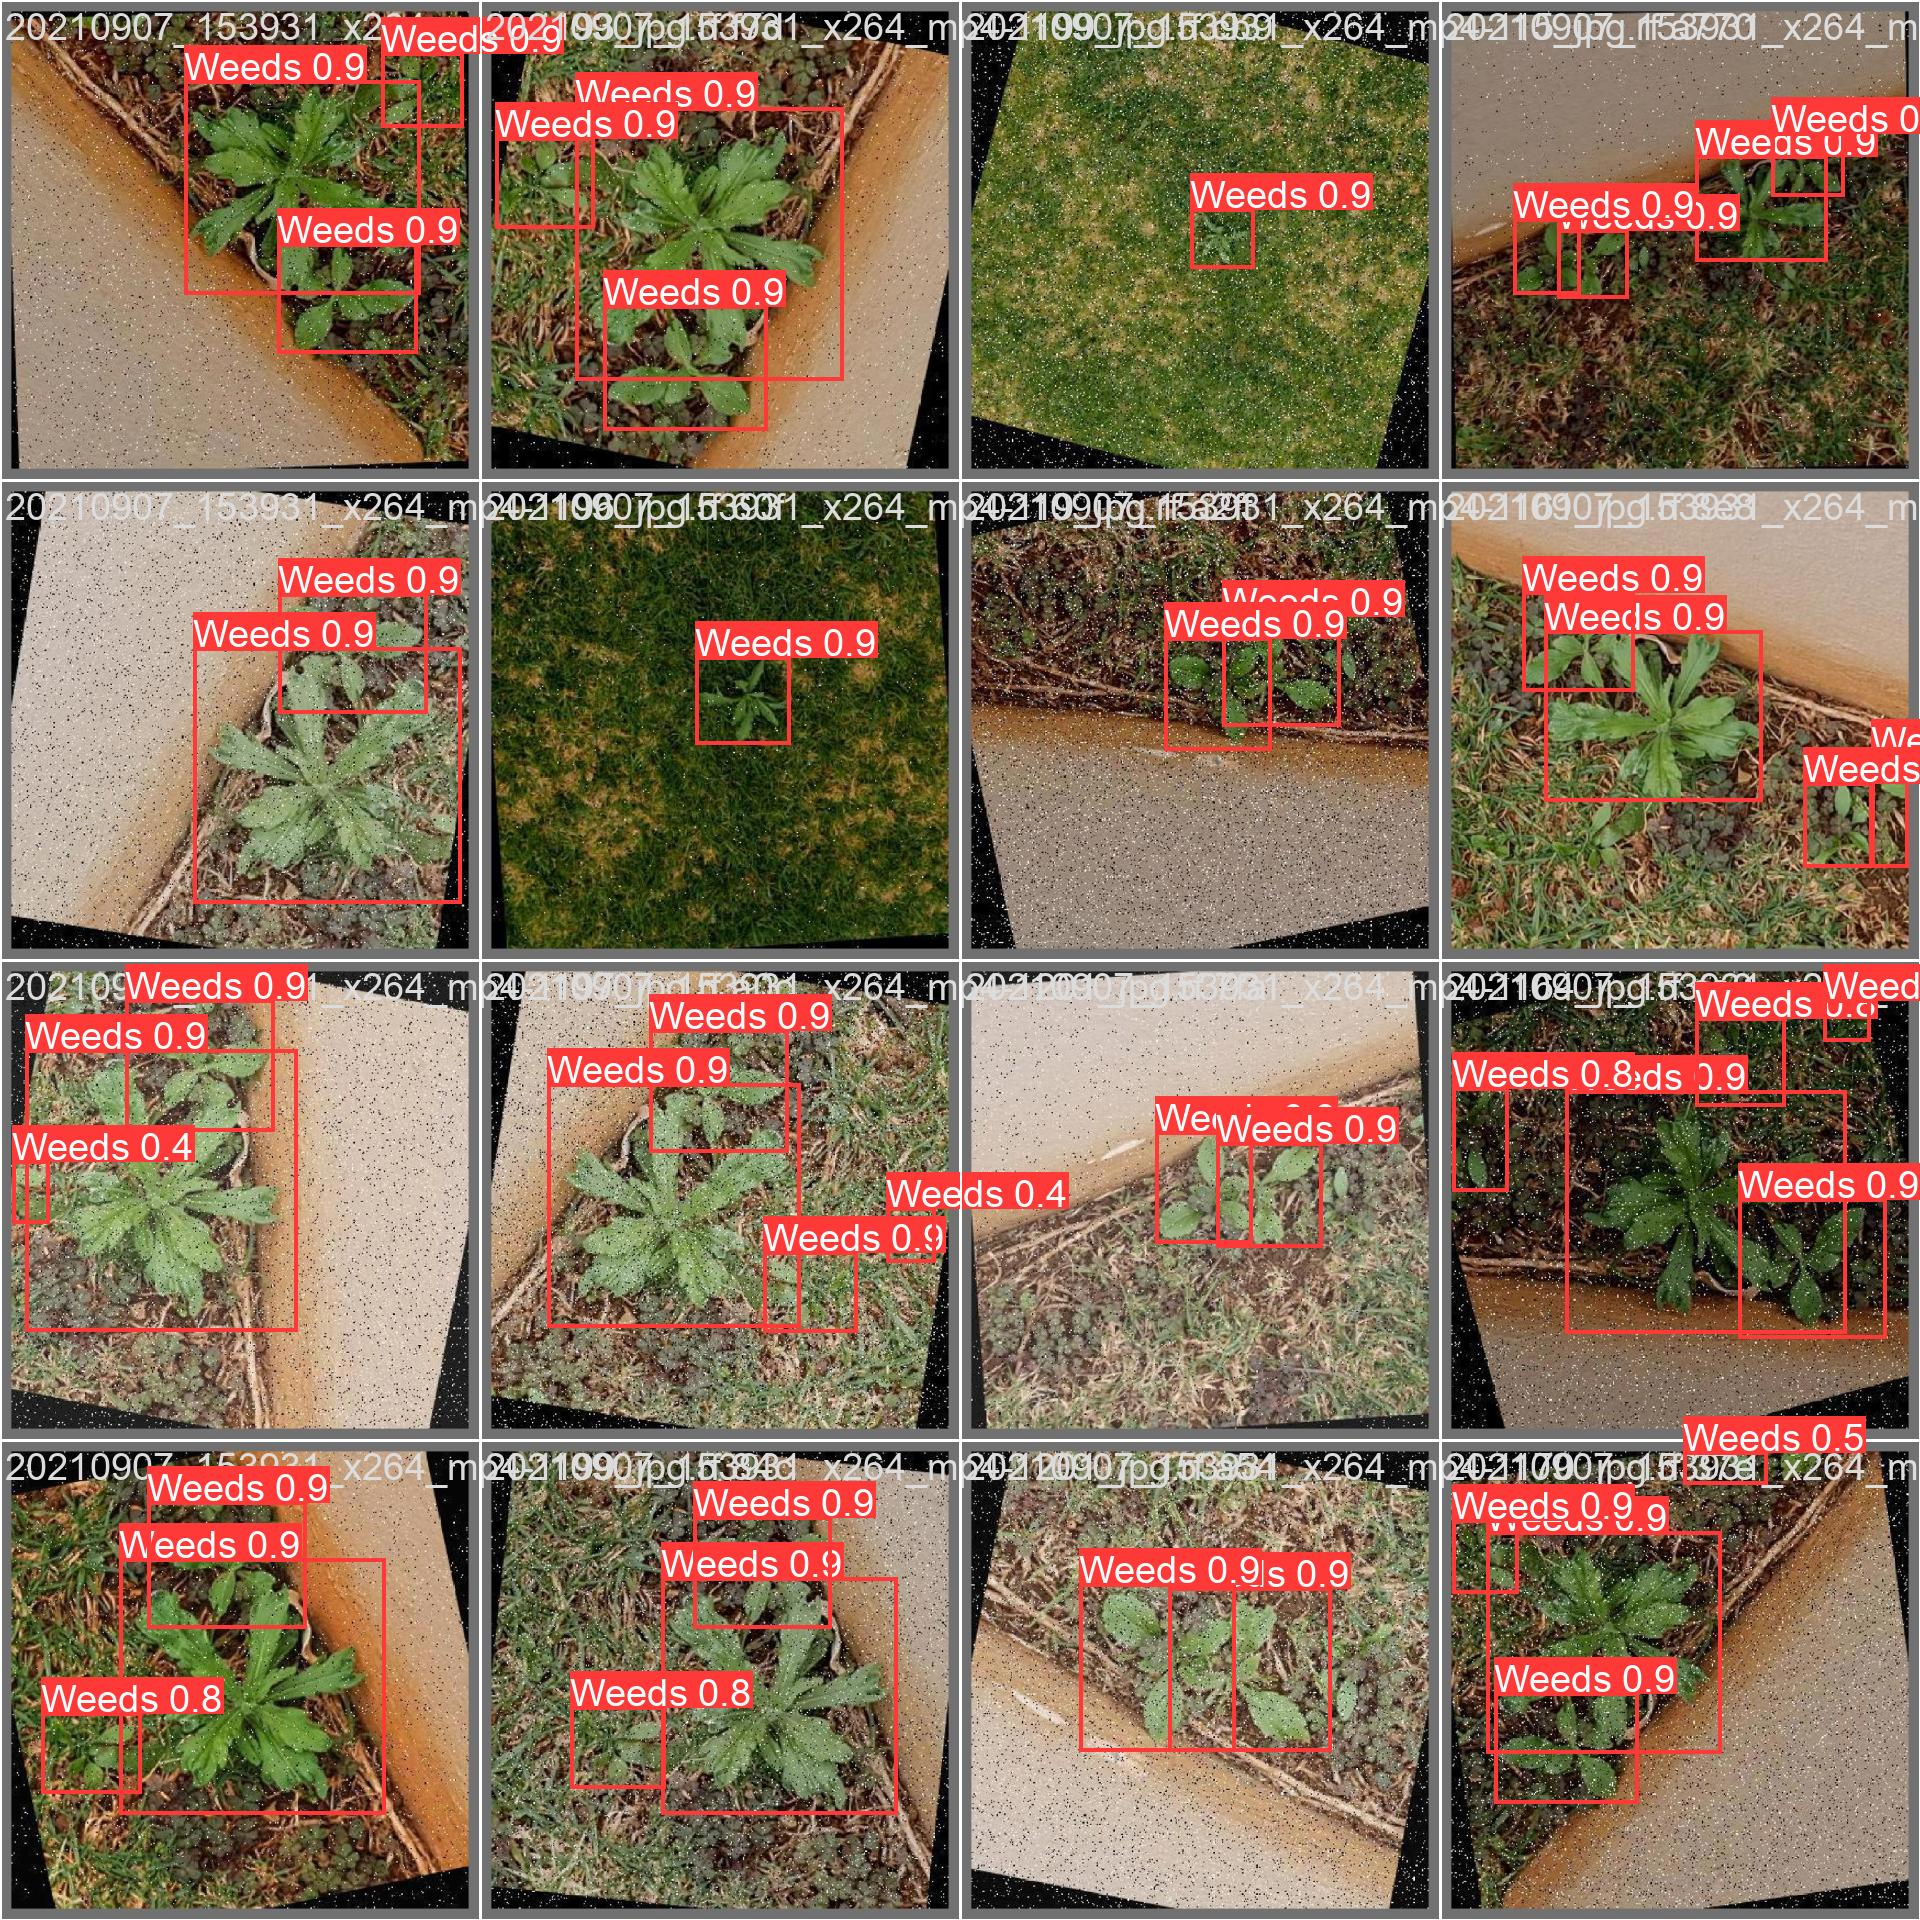

In [12]:
Image(filename='/content/drive/MyDrive/AgriSense_yolov8/runs/detect/v8_weeds_detection/val_batch1_pred.jpg', width=600)

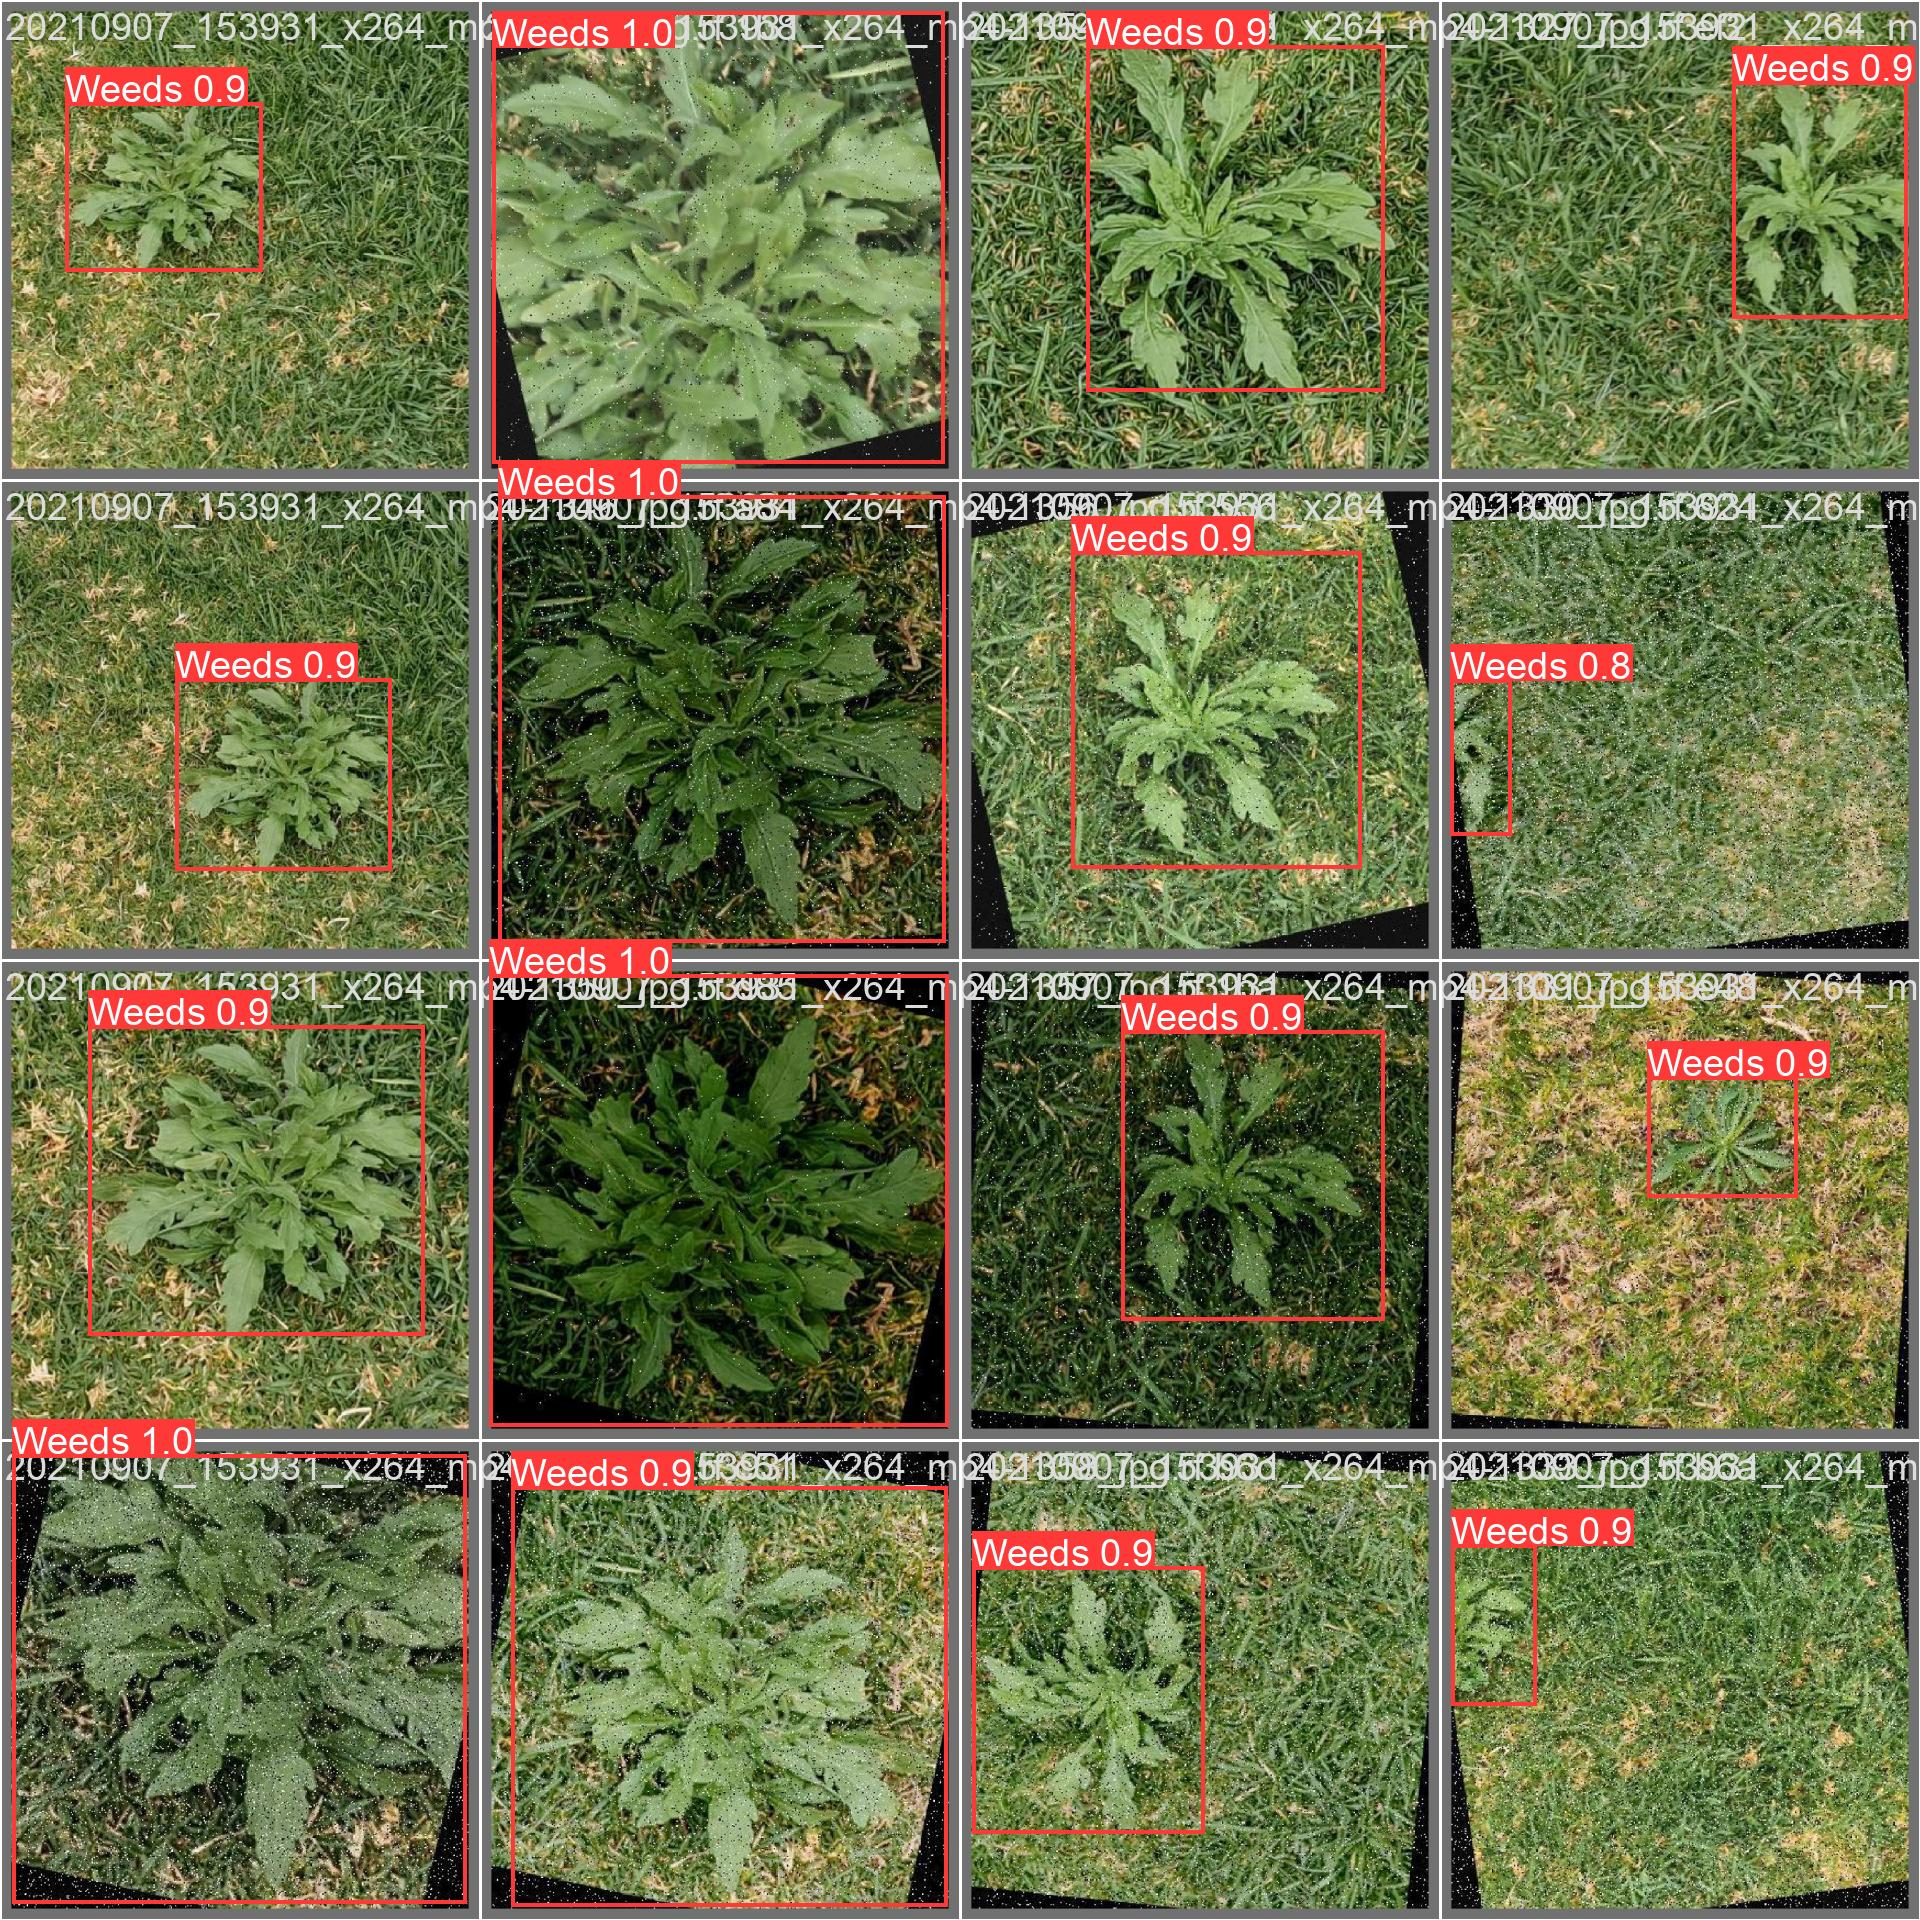

In [13]:
Image(filename='/content/drive/MyDrive/AgriSense_yolov8/runs/detect/v8_weeds_detection/val_batch2_pred.jpg', width=600)